# Базовая модель 

In [18]:
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords 

train = pd.read_parquet('data_fusion_train.parquet', engine='pyarrow')
train = train[train.category_id != -1].drop_duplicates('item_name')

In [13]:
## Сжатая модель FAST TEXT

## 

import compress_fasttext

small_model = compress_fasttext.models.CompressedFastTextKeyedVectors.load(
        './ft_freqprune_100K_20K_pq_100.bin'
    )

In [19]:
## Подготовка данных: удаление всех не кирелических символов и слов короче 2х символов

import re

product_names_arr = [[s for s in re.sub("[^а-я$]", " ", i.lower()).split(' ') if len(s) > 1] for i in train["item_name"].tolist()]


In [21]:
## Прогон по модели: получение embendding-ов слов

100%|██████████| 48225/48225 [00:25<00:00, 1917.58it/s]


from tqdm import tqdm

product_embenddings_arr = [] 
for product_names in tqdm(product_names_arr):
    product_embenddings_arr.append([small_model[i] for i in product_names])


In [22]:
## Получение embendding-ов товаров

In [17]:
sum_of_embds = [sum(i) for i in product_embenddings_arr]

KNeighborsClassifier()

from sklearn.neighbors import KNeighborsClassifier

data = [i.tolist() if not isinstance(i, int) else [0]*300 for i in sum_of_embds]
labels = train["category_id"].tolist()

classifier = KNeighborsClassifier()
classifier.fit(data, labels)

In [23]:
## Оценка качества

              precision    recall  f1-score   support

           0       0.91      0.79      0.84      2726
           1       0.75      0.48      0.58        44
           2       0.88      0.80      0.84       350
           3       0.84      0.77      0.80       120
           4       0.68      0.55      0.61       276
           6       0.52      0.33      0.40       101
           7       0.97      0.92      0.94       238
           9       0.98      0.92      0.95       111
          11       0.57      0.40      0.47        68
          12       0.70      0.63      0.66       204
          13       0.51      0.68      0.58        28
          19       0.68      0.57      0.62        88
          20       0.83      0.83      0.83        59
          24       0.54      0.71      0.62        52
          26       0.50      0.46      0.48        24
          27       0.66      0.76      0.70        33
          29       0.86      0.74      0.80       149
          30       0.69    

/home/web/workspace/kaggle/check_recognizer/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/web/workspace/kaggle/check_recognizer/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/web/workspace/kaggle/check_recognizer/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

from sklearn.metrics import classification_report

print(classification_report(classifier.predict(data), labels))

In [24]:
## Визуализиция embendding-ов

In [25]:
from sklearn import manifold

tsne = manifold.TSNE(n_components = 2, init = 'pca', random_state = 0)
data_2d_tsne = tsne.fit_transform(data)

Populating the interactive namespace from numpy and matplotlib


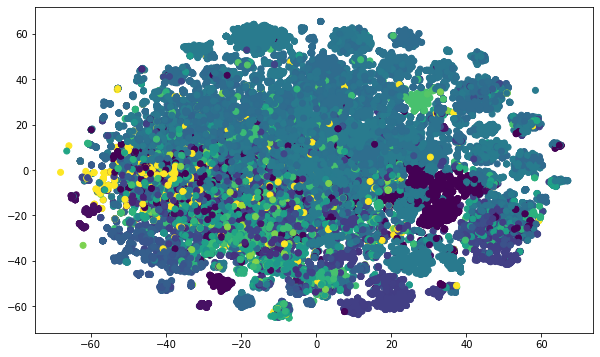

In [26]:
from matplotlib import pyplot as PLT
%pylab inline

In [ ]:
pylab.figure(figsize = (10, 6))
pylab.scatter(data_2d_tsne[:, 0], data_2d_tsne[:, 1], c = labels)

# Что будет если не выкидывать слова длинной в 1 символ?

## Подготовка данных: удаление всех не кирелических символов и слов короче 1х символов

In [ ]:
import re

product_names_arr = [[s for s in re.sub("[^а-я$]", " ", i.lower()).split(' ') if len(s) > 0] for i in train["item_name"].tolist()]


## Прогон по модели: получение embendding-ов слов

In [ ]:
from tqdm import tqdm

product_embenddings_arr = []
for product_names in tqdm(product_names_arr):
    product_embenddings_arr.append([small_model[i] for i in product_names])


## Получение embendding-ов товаров

In [ ]:
sum_of_embds = [sum(i) for i in product_embenddings_arr]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

data = [i.tolist() if not isinstance(i, int) else [0]*300 for i in sum_of_embds]
labels = train["category_id"].tolist()

classifier = KNeighborsClassifier()
classifier.fit(data, labels)

## Оценка качества

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(classifier.predict(data), labels))

## Визуализиция embendding-ов

In [ ]:
from sklearn import manifold

tsne = manifold.TSNE(n_components = 2, init = 'pca', random_state = 0)
data_2d_tsne = tsne.fit_transform(data)

In [ ]:
from matplotlib import pyplot as PLT
%pylab inline

In [ ]:
pylab.figure(figsize = (10, 6))
pylab.scatter(data_2d_tsne[:, 0], data_2d_tsne[:, 1], c = labels)